On vérifie la cohérence de nos résultats de différence de points de contact pour deux potentiels différents. Il nous suffit de prendre un exemple, le calculer indépendamment du code a l'aide de nos résultats, puis de le comparer avec les résultats de notre interface.

In [1]:
import numpy as np
import scipy.constants as sc

def xs(v0, theta, y0, q, E, m_u, x0):
    """
    x_s = ( v0*cosθ − sqrt((v0*cosθ)^2 − 2*y0*q*E/m) )
          / ( (q/m)*E ) * v0*sinθ + x0
    m_u : masse en unités atomiques
    """

    m = m_u * sc.u  
    cosθ = np.cos(theta)
    sinθ = np.sin(theta)

    num = v0 * cosθ - np.sqrt((v0 * cosθ)**2 - (2 * y0 * q * sc.e * E) / (m))
    den = (q * sc.e * E) / m

    return (num / den) * v0 * sinθ + x0


def champ_electrique_v2(distance, difference_pot):
    if distance <= 0:
        raise ValueError
    return difference_pot / distance  

v0 = 1e5
θ = np.radians(30)
y0 = 0.05
q = -1
E1 = champ_electrique_v2(0.05, 2000)  
E2 = champ_electrique_v2(0.05, 1000)
m_u = 31.998
x0 = 0

x1 = xs(v0, θ, y0, q, E1, m_u, x0)
x2 = xs(v0, θ, y0, q, E2, m_u, x0)
print("Δx =", abs(x2 - x1))
print("x1 =", x1)
print("x2 =", x2)

Δx = 0.0025612546067142646
x1 = 0.022078497281392124
x2 = 0.02463975188810639


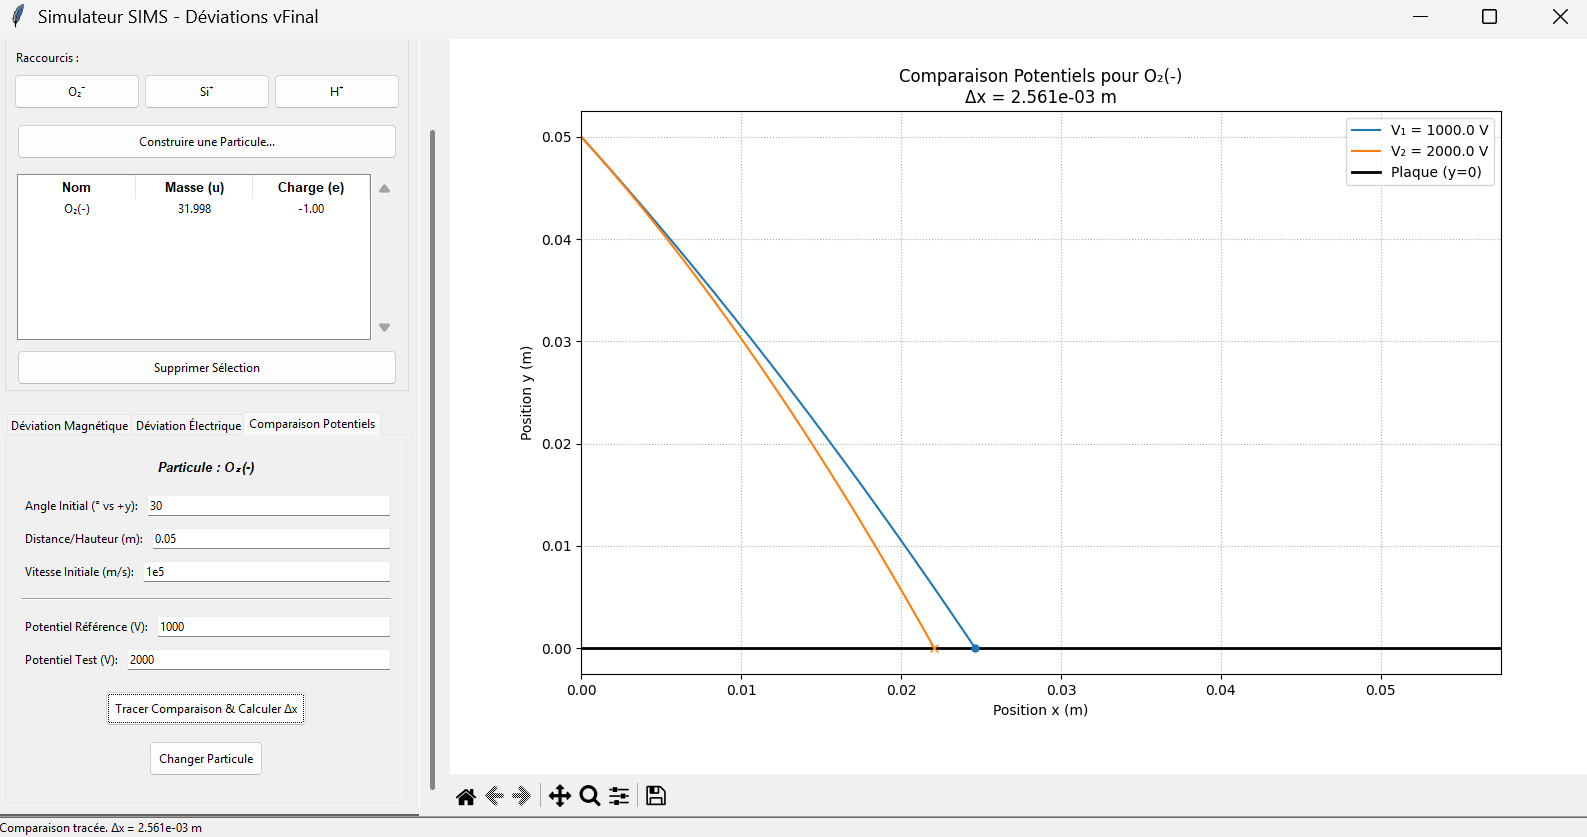

On remarque bien que nos résultats sont confondus, donc notre code est cohérent